In [1]:
# Imports necessários

from scripts.preprocessing import *


In [3]:
# Caminho do arquivo CSV
dataset_path = "../dataset/raw/data_date.csv"

# Carregar o dataset
try:
    df = pd.read_csv(dataset_path, encoding="utf-8")  # Testando UTF-8
    print("✅ Dataset carregado com sucesso usando UTF-8.")
except UnicodeDecodeError:
    df = pd.read_csv(dataset_path, encoding="ISO-8859-1")  # Caso UTF-8 falhe
    print("✅ Dataset carregado com sucesso usando ISO-8859-1.")


✅ Dataset carregado com sucesso usando UTF-8.


In [13]:
# 1️⃣ Visão geral do dataset
print("\n📌 Informações Gerais do Dataset:")
df.info()

print("\n🔍 Primeiras 5 linhas do dataset:")
print(df.head())

print("\n🔍 Últimas 5 linhas do dataset:")
print(df.tail())


📌 Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17511 entries, 0 to 17510
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       17511 non-null  object
 1   Country    17511 non-null  object
 2   Status     17511 non-null  object
 3   AQI Value  17511 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 547.3+ KB

🔍 Primeiras 5 linhas do dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

🔍 Últimas 5 linhas do dataset:
             Date                                            Country  \
17506  2025-01-30  United 

In [14]:
# 2️⃣ Estatísticas descritivas
print("\n📊 Estatísticas descritivas:")
print(df.describe())


📊 Estatísticas descritivas:
          AQI Value
count  17511.000000
mean      63.117755
std       49.969795
min        1.000000
25%       29.000000
50%       53.000000
75%       83.000000
max      963.000000


In [15]:
# 3️⃣ Verificar valores nulos
print("\n🔍 Quantidade de valores nulos por coluna:")
print(df.isnull().sum())


🔍 Quantidade de valores nulos por coluna:
Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


In [16]:
# 4️⃣ Verificar valores únicos por coluna
print("\n🔍 Quantidade de valores únicos por coluna:")
print(df.nunique())


🔍 Quantidade de valores únicos por coluna:
Date         120
Country      142
Status         6
AQI Value    337
dtype: int64


In [17]:
# 5️⃣ Verificar tipos de dados
print("\n📌 Tipos de dados das colunas:")
print(df.dtypes)



📌 Tipos de dados das colunas:
Date         object
Country      object
Status       object
AQI Value     int64
dtype: object


In [18]:
# 6️⃣ Dimensão do dataset
print("\n📏 Dimensão do dataset (linhas, colunas):", df.shape)


📏 Dimensão do dataset (linhas, colunas): (17511, 4)


In [19]:
# 7️⃣ Identificar registros duplicados
print("\n🔍 Número de registros duplicados:", df.duplicated().sum())


🔍 Número de registros duplicados: 300


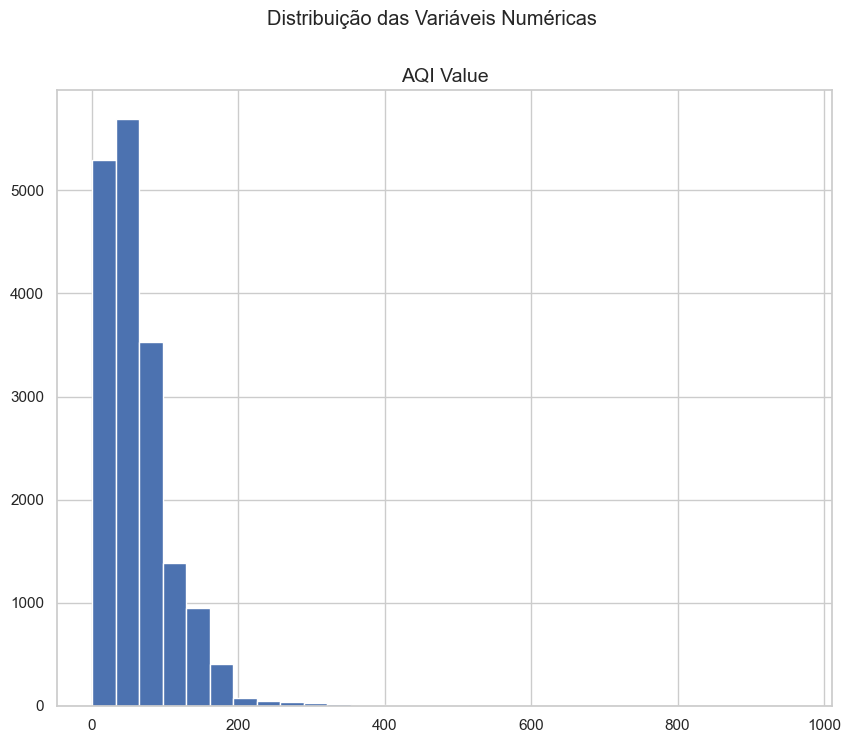

In [4]:
# 8️⃣ Histograma das variáveis numéricas
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()


🔍 Frequência das Categorias:

Coluna: Date
Date
2022-07-22    423
2022-07-21    284
2022-07-23    282
2022-07-26    282
2022-08-23    282
             ... 
2024-10-31    120
2024-10-03    119
2024-11-07    119
2024-11-14    119
2024-11-21    118
Name: count, Length: 120, dtype: int64

Coluna: Country
Country
Albania                     129
Andorra                     129
Armenia                     129
Argentina                   129
Austria                     129
                           ... 
Guam                         89
Central African Republic     82
Sudan                        78
Gambia                       71
Saudi Arabia                 29
Name: count, Length: 142, dtype: int64

Coluna: Status
Status
Good                              8342
Moderate                          6351
Unhealthy for Sensitive Groups    1821
Unhealthy                          771
Very Unhealthy                     144
Hazardous                           82
Name: count, dtype: int64


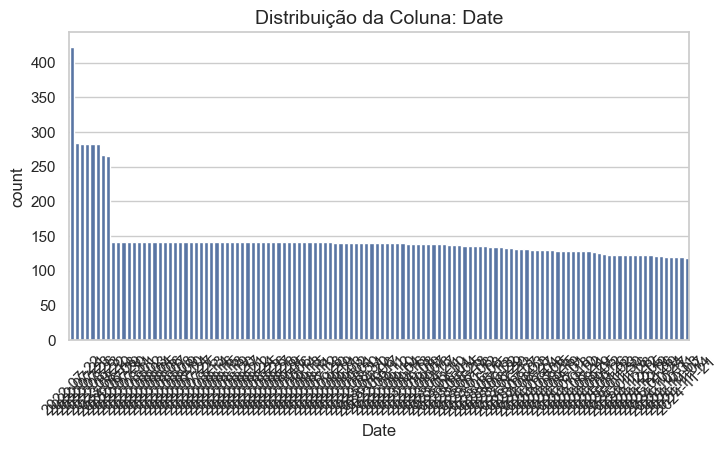

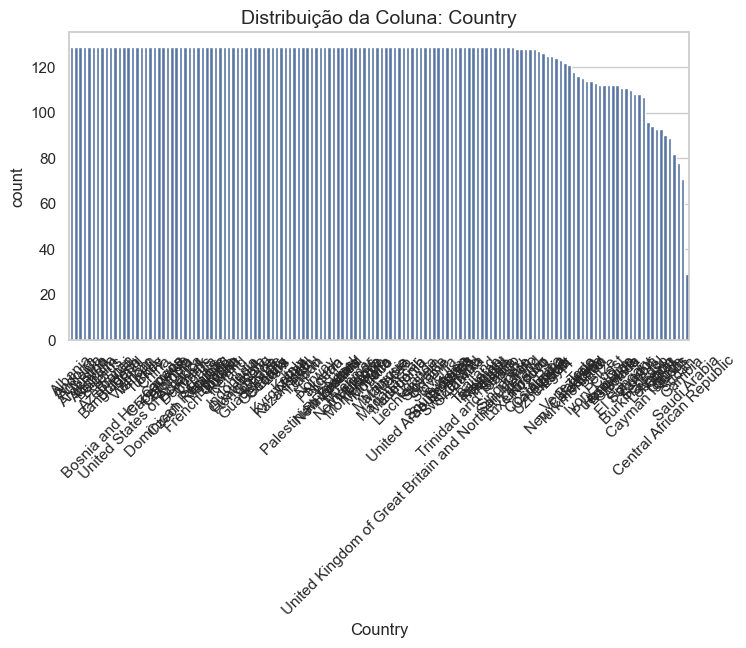

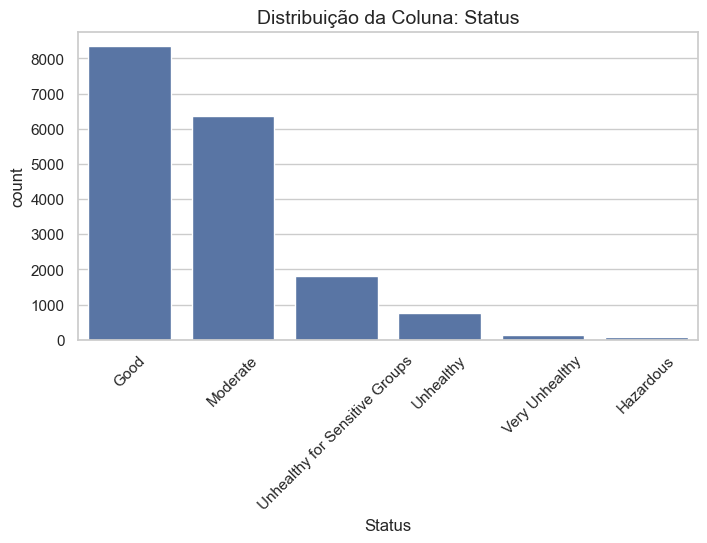

In [5]:
# 9️⃣ Frequência das categorias


print("\n🔍 Frequência das Categorias:")
for col in df.select_dtypes(include="object"):
    print(f"\nColuna: {col}")
    print(df[col].value_counts())

# Gráficos de barras para categorias
for col in df.select_dtypes(include="object"):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribuição da Coluna: {col}")
    plt.xticks(rotation=45)
    plt.show()

In [9]:
# Verificar valores não numéricos na coluna "AQI Value"

non_numeric_values = df[~df["AQI Value"].apply(lambda x: str(x).replace(".", "", 1).isdigit())]
print("\n🔍 Valores não numéricos na coluna 'AQI Value':")
print(non_numeric_values)


🔍 Valores não numéricos na coluna 'AQI Value':
Empty DataFrame
Columns: [Date, Country, Status, AQI Value]
Index: []


In [10]:
# Remover registros com valores não numéricos na coluna "AQI Value"
df = df[df["AQI Value"].apply(lambda x: str(x).replace(".", "", 1).isdigit())]

# Converter "AQI Value" para numérico
df["AQI Value"] = df["AQI Value"].astype(float)


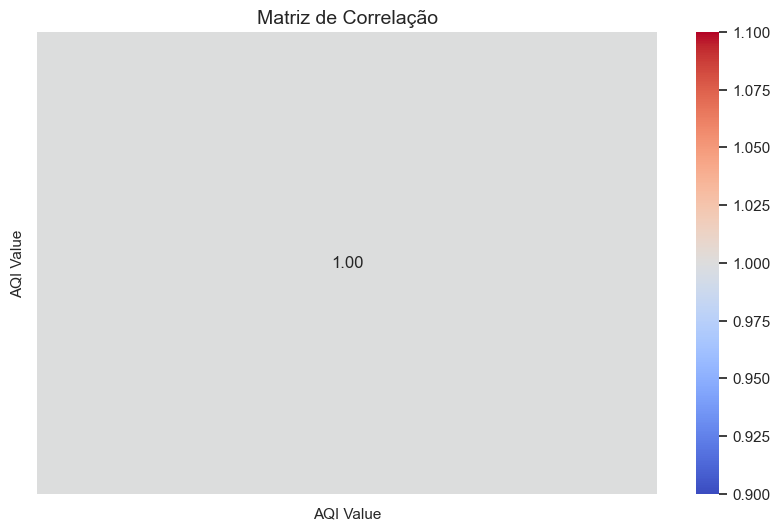

In [12]:
# 1️⃣0️⃣ Matriz de correlação

# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Calcular e exibir a matriz de correlação
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


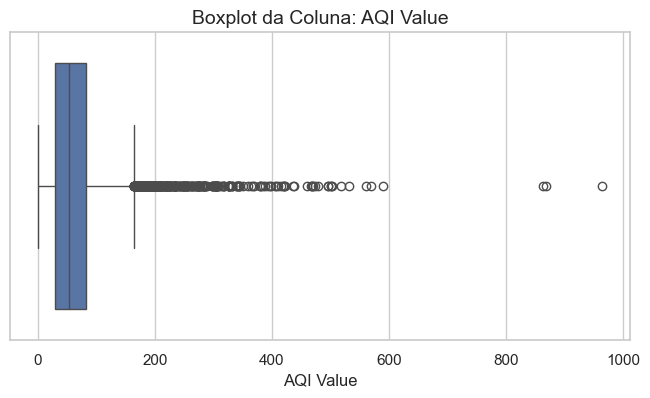

In [13]:
# 1️⃣1️⃣ Detecção de Outliers: Boxplots para variáveis numéricas
for col in df.select_dtypes(include=["float64", "int64"]):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot da Coluna: {col}")
    plt.show()

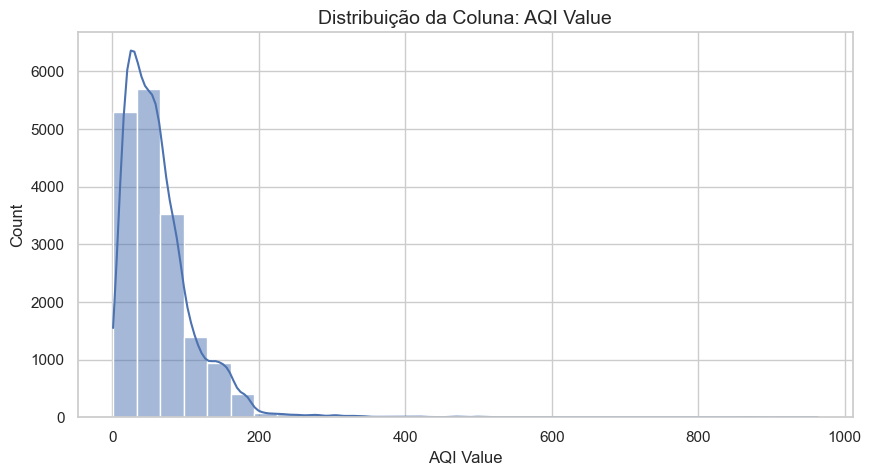

In [14]:
# 1️⃣2️⃣ Resumo estatístico visual
for col in df.select_dtypes(include=["float64", "int64"]):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribuição da Coluna: {col}")
    plt.show()
